In [126]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#loading the dataset
df=pd.read_csv("dataset.csv")

In [128]:
# feature engineering
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Month'] = df.index.month
df['Year'] = df.index.year

In [129]:
# dataset row & column
df.shape

(185, 6)

In [130]:
# dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
 4   Month   185 non-null    int32  
 5   Year    185 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 8.7 KB


In [131]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
Month    0
Year     0
dtype: int64

In [132]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Month', 'Year'], dtype='object')

In [133]:
df.nunique()

Open     183
High     184
Low      183
Close    185
Month     12
Year      16
dtype: int64

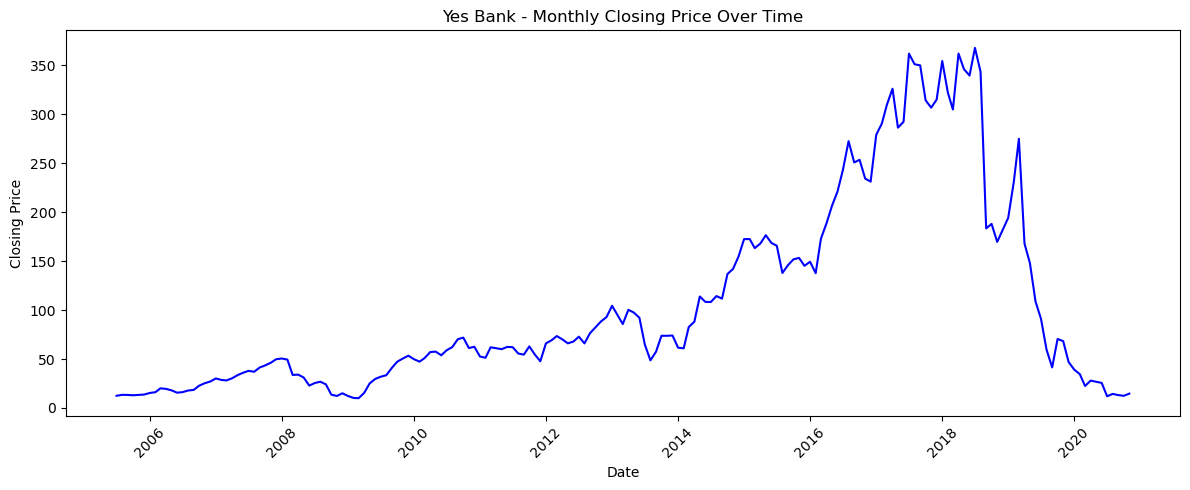

In [134]:
# EDA and Data Visualisation 
# 1. Line plot of Closing Prices over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], color='blue')
plt.title("Yes Bank - Monthly Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Madhusudan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Madhusudan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


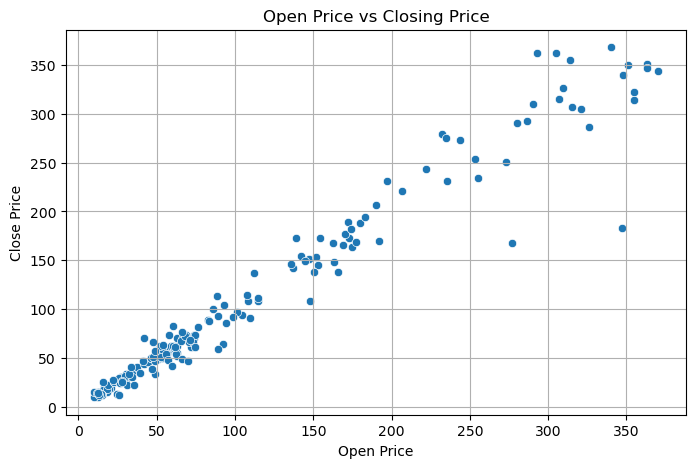

In [46]:
# 2. Scatter Plot – Open vs Close
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open Price vs Closing Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


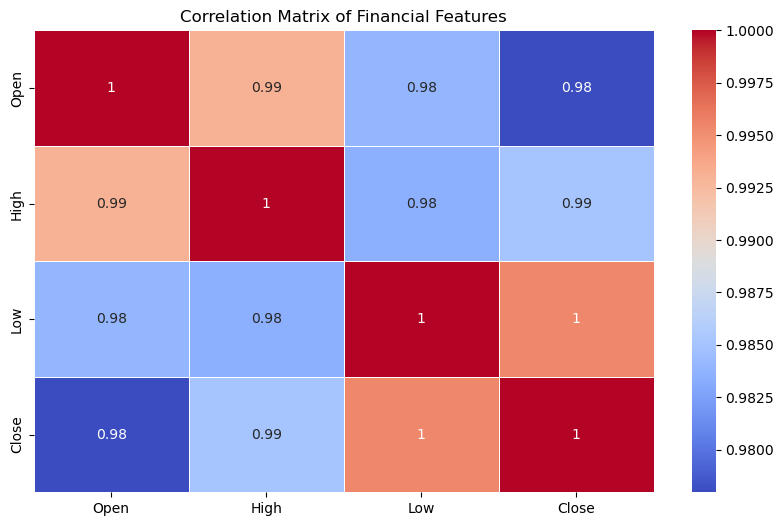

In [136]:
# 3. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close',]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Financial Features")
plt.show()


In [48]:
3.# machine learning Implementation

from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Open', 'High', 'Low', 'Month', 'Year' ]]  # Features
y = df['Close'] # Target variable (what we want to predict)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shape of datasets
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print(" Training Labels:", y_train.shape)
print(" Testing Labels:", y_test.shape)


Training Features: (148, 5)
Testing Features: (37, 5)
 Training Labels: (148,)
 Testing Labels: (37,)


In [49]:
# model 1
#linear Regression implenation 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict the closing prices using the test features
y_pred = lr_model.predict(X_test)




C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [66]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")


 Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 5.8963
Mean Squared Error (MSE): 84.0189
R-squared (R² Score): 0.9907


C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

In [85]:
#model 2
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Create and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred_rf = rf_model.predict(X_test)

C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [86]:

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred_rf )
mse = mean_squared_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)

# Print the scores
print("Random Forest  Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")

Random Forest  Model Evaluation:
Mean Absolute Error (MAE): 8.6831
Mean Squared Error (MSE): 196.3847
R-squared (R² Score): 0.9783


C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

In [88]:
# Random Forest with hypertunning parameter
from sklearn.model_selection import  RandomizedSearchCV
rf = RandomForestRegressor( random_state=42)
param_rfr = {'max_depth':[1,50,100,150,200],
             'n_estimators':[50,100,200]}
reg =  RandomizedSearchCV(rf,param_distributions=param_rfr,cv = 5,scoring='r2')
reg.fit(X_train, y_train)
rf_pred = reg.predict(X_test)

C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [84]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test,rf_pred)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test,rf_pred)

# Print results
print("📊 Random Forest (Tuned) Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Random Forest (Tuned) Evaluation:
Mean Absolute Error (MAE): 8.6831
Mean Squared Error (MSE): 196.3847
R² Score: 0.9783


C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

In [78]:
#Model 3
#Xgboost model 
!pip install xgboost


In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Predict the closing prices on test data
y_pred_xgb = xgb_model.predict(X_test)

In [80]:
# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print("XGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


✅ XGBoost Model Evaluation:
Mean Absolute Error (MAE): 9.9276
Mean Squared Error (MSE): 223.3694
R² Score: 0.9753


C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

In [95]:

from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Step 2: Create XGBRegressor model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 3: RandomizedSearchCV for tuning
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the model
xgb_random_search.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred_xgb_tuned = xgb_random_search.predict(X_test)
print(" Best Parameters:", xgb_random_search.best_params_)
print("xgboost(tunned)")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_xgb_tuned))
print("R² Score:", r2_score(y_test, y_pred_xgb_tuned))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Best Parameters: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
xgboost(tunned)
📊 MAE: 8.80476062877758
📊 MSE: 179.06802294589565
📈 R² Score: 0.9801890335230272


C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Madhusudan\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

C:\Users\Madhusudan\AppData\Local\Temp\ipykernel_7912\1328298504.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()


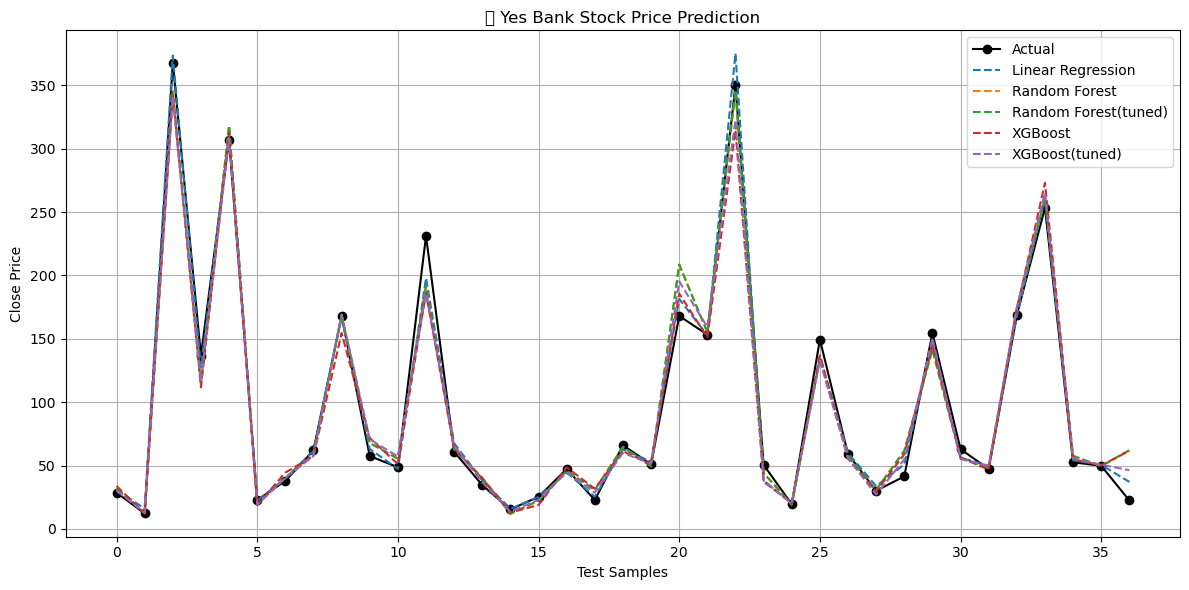

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', color='black')
plt.plot(y_pred, label='Linear Regression', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(rf_pred, label='Random Forest(tuned)', linestyle='--')
plt.plot(y_pred_xgb, label='XGBoost', linestyle='--')
plt.plot(y_pred_xgb_tuned, label='XGBoost(tuned)', linestyle='--')

plt.title("📈 Yes Bank Stock Price Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()